In [1]:
pip install nomad-lab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 MB 6.8 MB/s eta 0:00:000m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ase-3.22.1-py3-none-any.whl.metadata (3.1 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
  Using cached h5py-3.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached matid-2.1.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━

header E/ev[1]            ALPHA-Im[2]        ALPHA-Re[3]        ALPHAo-Im[4]       ALPHAo-Re[5]


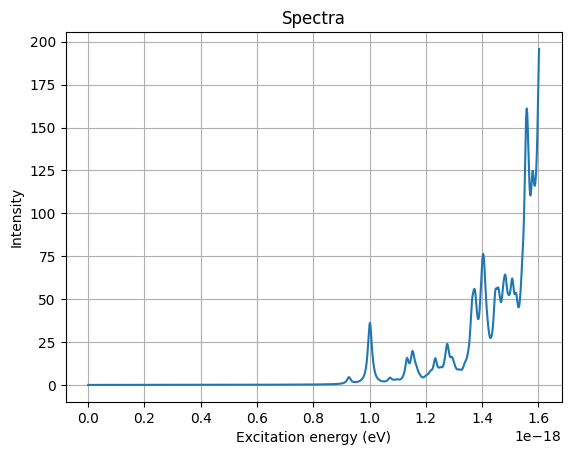

In [4]:
#SECOND VERSION
import numpy as np
import re
from nomad.units import ureg  
from nomad.datamodel.metainfo.simulation.calculation import Spectra
import matplotlib.pyplot as plt

file_path = r"o-R_methylox_TDLDA.alpha_q1_slepc_alda_bse"
re_f = r'-?\d+\.\d+(?:[eE][+-]?\d+)?'

with open(file_path, 'r') as file:
    reading_output_file = file.read()

output_spectra = r'E/ev\[1\].*?Im\[2\].*?Re\[3\](.*?Im\[4\].*?Re\[5\])?'
header_match = re.search(output_spectra, reading_output_file)

if header_match:
    header = header_match.group(0)
    print('header', header)
    
    has_5_columns = bool(header_match.group(1)) 

    header_position = header_match.end()
    data_text = reading_output_file[header_position:]
    
    if has_5_columns:
        data_pattern = rf'\s*({re_f})\s+({re_f})\s+({re_f})\s+({re_f})\s+({re_f})'
    else:
        data_pattern = rf'\s*({re_f})\s+({re_f})\s+({re_f})'
    
    matches = re.finditer(data_pattern, data_text, re.MULTILINE)

    all_data = []
    for match in matches:
        row = [float(match.group(i)) for i in range(1, match.lastindex + 1)]
        all_data.append(row)
    
    all_data = np.array(all_data)

    spectra = Spectra(
        n_energies = all_data.shape[0],
        excitation_energies = all_data[:, 0] * ureg.eV,
        intensities = all_data[:, 1]
    )

    plt.plot(
        spectra.excitation_energies.magnitude,
        spectra.intensities
    )
    plt.xlabel("Excitation energy (eV)")
    plt.ylabel("Intensity")
    plt.title("Spectra")
    plt.grid(True)
    plt.show()

else:
    print("Header not found.")
